In [2]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import plotly.graph_objects as go

import jdatetime

In [3]:
path = "../data"
nowruz_path = os.path.join(path, "traffic/nowruz_03")

In [4]:
roads_df = pd.read_csv(os.path.join(path, "road_data.csv"))
roads_df['code'] = roads_df['code'].astype(str)
roads_df.head()

,code,type,origin,destination,place
0,113201,آزادراه,قم,گرمسار,چرمشهر
1,113202,NaN,شهریار,کرج,هفت جوی
2,113203,آزادراه,تهران,قم,مجتمع یاس
3,113206,آزادراه,تهران,پردیس,عوارضی پردیس
4,113207,آزادراه,تهران,پردیس,بومهن


## Plot in and out

In [5]:
province_code = '31'
city = 'مشهد'

In [6]:
city_roads_df = roads_df.loc[roads_df['code'].str.startswith(province_code) & ((roads_df['origin'] == city) | (roads_df['destination'] == city))]
city_roads_df

,code,type,origin,destination,place
648,313102,NaN,مشهد,سرخس,مشهد - رضویه
649,313103,NaN,مشهد,چناران,مشهد - تقاطع آزادراه
650,313104,NaN,مشهد,فریمان,تپه سلام - سنگ بست
651,313105,آزادراه,مشهد,باغچه,مشهد
652,313106,NaN,مشهد,سدکارده,سه‌راه کارده
653,313107,NaN,مشهد,کلات,سه‌راه کارده
654,313108,NaN,مشهد,سرخس,سرخس
655,313109,جاده قدیم,مشهد,باغچه,NaN
656,313110,NaN,مشهد,سرخس,رضویه - آبروان
657,313111,NaN,مشهد,شاندیز,NaN


In [7]:
# remove unwanted roads
unwanted_type = ['عوارضی', 'کمربندی']
unwanted_roads = []

city_roads_df = city_roads_df.drop(city_roads_df[city_roads_df.type.isin(unwanted_type)].index)
city_roads_df = city_roads_df.drop(city_roads_df[city_roads_df.code.isin(unwanted_roads)].index)

city_roads_df

,code,type,origin,destination,place
648,313102,NaN,مشهد,سرخس,مشهد - رضویه
649,313103,NaN,مشهد,چناران,مشهد - تقاطع آزادراه
650,313104,NaN,مشهد,فریمان,تپه سلام - سنگ بست
651,313105,آزادراه,مشهد,باغچه,مشهد
652,313106,NaN,مشهد,سدکارده,سه‌راه کارده
653,313107,NaN,مشهد,کلات,سه‌راه کارده
654,313108,NaN,مشهد,سرخس,سرخس
655,313109,جاده قدیم,مشهد,باغچه,NaN
656,313110,NaN,مشهد,سرخس,رضویه - آبروان
657,313111,NaN,مشهد,شاندیز,NaN


In [8]:
duplicates = city_roads_df.duplicated(subset=['type', 'origin', 'destination'], keep=False)
df_duplicates = city_roads_df[duplicates]
df_duplicates = df_duplicates.fillna('nan').groupby(['type', 'origin', 'destination'])['code'].apply(list)
df_duplicates

type     origin   destination
nan      سرخس     مشهد           [313152, 313158, 313160]
         فریمان   مشهد           [313122, 313154, 313352]
         مشهد     تربت حیدریه            [313274, 313802]
                  سرخس           [313102, 313108, 313110]
                  فریمان         [313104, 313172, 313302]
                  نیشابور                [313195, 313273]
                  چناران                 [313103, 313902]
                  کلات                   [313107, 313130]
         نیشابور  مشهد                   [313145, 313223]
         چناران   مشهد                   [313153, 313952]
         کلات     مشهد                   [313157, 313180]
آزادراه  باغچه    مشهد                   [313155, 313196]
         مشهد     باغچه                  [313105, 313146]
Name: code, dtype: object

In [9]:
pathToCompared = os.path.join(path, "total_sum_car_sorted")
file_compared = os.path.join(pathToCompared, "compared.csv")
df_compared = pd.read_csv(file_compared)
df_compared.drop(columns='Unnamed: 0', inplace=True)
df_compared['code'] = df_compared['code'].astype(int).astype(str)
df_compared.head()

,code,name_x,est_sum_total_est_x,est_sum_total_est_y,growth_rate
0,513404,خمين - اليگودرز,59695,3941.0,1414.717077
1,113413,آبعلي - پلور (سه‌راهي مشاء - امامزاده هاشم),271647,45914.0,491.643072
2,333151,بيرجند - سرايان (سرايان),29268,5220.0,460.689655
3,333158,عرب آباد - ديهوک,40222,7469.0,438.519213
4,113203,آزادراه تهران - قم (مجتمع ياس),1056939,200733.0,426.539732


In [10]:
def drawchart(num):
    path = "F:\\Regression Analysis\\RA_P1\\data\\traffic\\"
    base_path_1 = os.path.join(path, "nowruz_02")
    file1 = os.path.join(base_path_1, f"{num}.csv")

    base_path_2 = os.path.join(path, "nowruz_03")
    file2 = os.path.join(base_path_2, f"{num}.csv")

    # Read both files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Optional: ensure date is string for consistent merging/sorting
    df1['date'] = df1['date'].astype(str).str[5:].str.replace("01-", "13-")
    df2['date'] = df2['date'].astype(str).str[5:].str.replace("01-", "13-")

    # Trim unwanted dates
    df1 = df1[(df1['date'] >= "12-29") & (df1['date'] <= "13-13")]
    df2 = df2[(df2['date'] >= "12-29") & (df2['date'] <= "13-13")]

    # Rename value columns to distinguish between the two
    name1 = (df1['name'].iloc[0] + "1402")
    name2 = (df2['name'].iloc[0] + "1403")
    df1 = df1[['date', 'car_est']].rename(columns={'car_est': name1})
    df2 = df2[['date', 'car_est']].rename(columns={'car_est': name2})

    # Merge the two DataFrames on 'date'
    merged = pd.merge(df1, df2, on='date', how='outer')

    # Melt to long format for Plotly
    df_long = merged.melt(id_vars='date', var_name='name', value_name='car_est')

    # Plot
    fig = px.line(
        df_long,
        x='date',
        y='car_est',
        color='name',
        title='تعداد سواری در روز، نوروز ۱۴۰۲ و ۱۴۰۳',
        markers=False
    )

    fig.update_layout(
        legend_title='نام محور',
        xaxis_title='تاریخ',
        xaxis_type='category',
        yaxis_title='تعداد',
        template='plotly_white',
        hovermode='x unified',
    )

    fig.show()

In [17]:
isfahan_dest = city_roads_df[city_roads_df['destination'] == 'مشهد']
isfahan_dest['code'] = isfahan_dest['code'].astype(int).astype(str)
df_merged = pd.merge(isfahan_dest, df_compared, on='code', how='left')
df_merged.sort_values(by='growth_rate', inplace=True)
df_merged.reset_index(inplace=True)
df_merged.drop(columns='index', inplace=True)
df_merged

C:\Users\Dr.moosavi\AppData\Local\Temp\ipykernel_10888\2346428205.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,code,type,origin,destination,place,name_x,est_sum_total_est_x,est_sum_total_est_y,growth_rate
0,313285,NaN,میامی,مشهد,NaN,ميامي - مشهد,102199,122654.0,-16.676994
1,313152,NaN,سرخس,مشهد,رضویه - مشهد,سرخس - مشهد (رضويه - مشهد),51387,59218.0,-13.224020
2,313154,NaN,فریمان,مشهد,سنگ بست - تپه سلام,فريمان - مشهد (سنگ بست - تپه سلام),122788,140203.0,-12.421275
3,313160,NaN,سرخس,مشهد,آبروان - رضویه,سرخس - مشهد (آبروان - رضويه),55595,62831.0,-11.516608
4,313180,NaN,کلات,مشهد,چنار - مشهد,کلات - مشهد (چنار - مشهد),21256,22531.0,-5.658870
5,313122,NaN,فریمان,مشهد,فریمان - سنگ بست,فريمان - مشهد (فريمان - سنگ بست),144001,147495.0,-2.368894
6,313159,جاده قدیم,باغچه,مشهد,NaN,جاده قديم باغچه - مشهد,34356,35176.0,-2.331135
7,313224,NaN,تربت حیدریه,مشهد,کمربندی تربت حیدریه) (متناظر توزین,تربت حيدريه - مشهد (کمربندي تربت حيدريه) (متنا...,147926,150589.0,-1.768389
8,313157,NaN,کلات,مشهد,سه‌راه کارده,کلات - مشهد (سه‌راه کارده),77905,78997.0,-1.382331
9,313196,آزادراه,باغچه,مشهد,باغچه,آزادراه باغچه - مشهد (باغچه),477524,474056.0,0.731559


In [18]:
# in_map = ['214902', '213163', '215104', '213164', '213153', '215253', '213154', '214762', '213279']
# df_merged = df_merged[df_merged['code'].isin(in_map)]
# df_merged.reset_index(inplace=True)
# df_merged.drop(columns='index', inplace=True)
# df_merged = df_merged[['code', 'name_x', 'growth_rate']]
df_merged

,code,type,origin,destination,place,name_x,est_sum_total_est_x,est_sum_total_est_y,growth_rate
0,313285,NaN,میامی,مشهد,NaN,ميامي - مشهد,102199,122654.0,-16.676994
1,313152,NaN,سرخس,مشهد,رضویه - مشهد,سرخس - مشهد (رضويه - مشهد),51387,59218.0,-13.224020
2,313154,NaN,فریمان,مشهد,سنگ بست - تپه سلام,فريمان - مشهد (سنگ بست - تپه سلام),122788,140203.0,-12.421275
3,313160,NaN,سرخس,مشهد,آبروان - رضویه,سرخس - مشهد (آبروان - رضويه),55595,62831.0,-11.516608
4,313180,NaN,کلات,مشهد,چنار - مشهد,کلات - مشهد (چنار - مشهد),21256,22531.0,-5.658870
5,313122,NaN,فریمان,مشهد,فریمان - سنگ بست,فريمان - مشهد (فريمان - سنگ بست),144001,147495.0,-2.368894
6,313159,جاده قدیم,باغچه,مشهد,NaN,جاده قديم باغچه - مشهد,34356,35176.0,-2.331135
7,313224,NaN,تربت حیدریه,مشهد,کمربندی تربت حیدریه) (متناظر توزین,تربت حيدريه - مشهد (کمربندي تربت حيدريه) (متنا...,147926,150589.0,-1.768389
8,313157,NaN,کلات,مشهد,سه‌راه کارده,کلات - مشهد (سه‌راه کارده),77905,78997.0,-1.382331
9,313196,آزادراه,باغچه,مشهد,باغچه,آزادراه باغچه - مشهد (باغچه),477524,474056.0,0.731559


In [19]:
for index, row in df_merged.iterrows():
    print(row.code)
    drawchart(row.code)

313285


313152


313154


313160


313180


313122


313159


313224


313157


313196


313852


313153


313952


313145


313155


313223


313158


313161


313156


313352


313194


313170


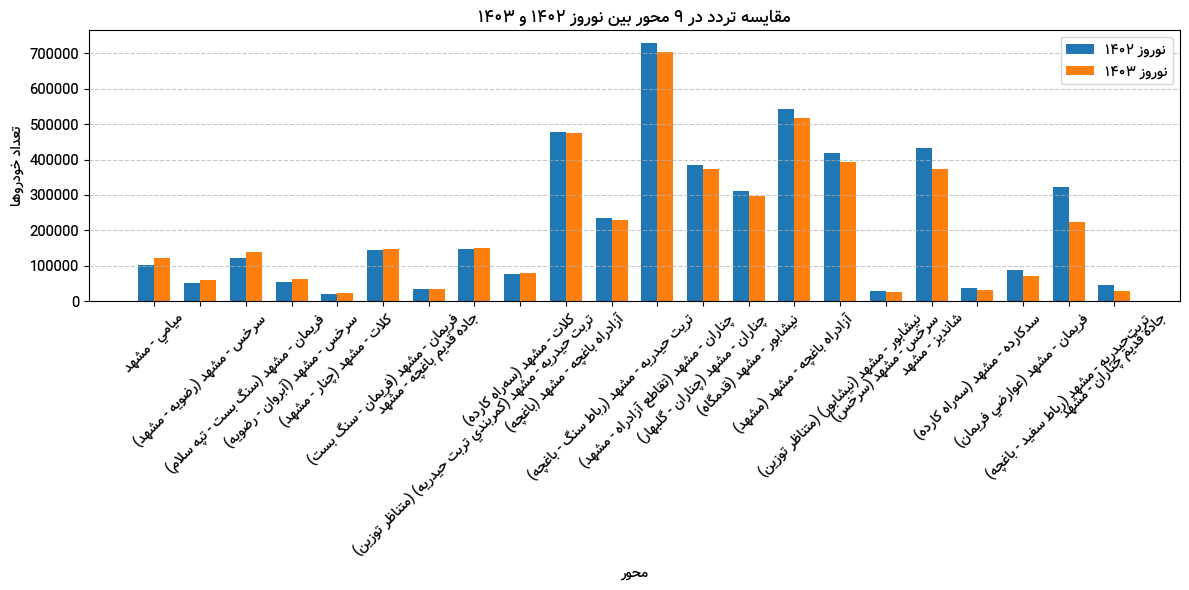

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display

# اعمال فونت دلخواه
matplotlib.rcParams['font.family'] = 'Vazir'
matplotlib.rcParams['axes.unicode_minus'] = False

# reshaping labels (مثلاً برای ستون‌ها)
labels = [get_display(arabic_reshaper.reshape(label)) for label in df_merged['name_x']]

count_02 = df_merged['est_sum_total_est_x']
count_03 = df_merged['est_sum_total_est_y']

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, count_02, width, label=get_display(arabic_reshaper.reshape('نوروز ۱۴۰۲')))
plt.bar(x + width/2, count_03, width, label=get_display(arabic_reshaper.reshape('نوروز ۱۴۰۳')))

plt.xlabel(get_display(arabic_reshaper.reshape('محور')))
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد خودروها')))
plt.title(get_display(arabic_reshaper.reshape('مقایسه تردد در ۹ محور بین نوروز ۱۴۰۲ و ۱۴۰۳')))
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
import plotly.graph_objects as go
import pandas as pd

# آماده‌سازی دیتافریم
df_bar = df_merged[['name_x', 'est_sum_total_est_x', 'est_sum_total_est_y']].copy()
df_bar.columns = ['محور', 'نوروز ۱۴۰۲', 'نوروز ۱۴۰۳']

# reshape کردن به فرمت long
df_long = df_bar.melt(id_vars='محور', var_name='سال', value_name='تعداد')

# رسم نمودار
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_long[df_long['سال'] == 'نوروز ۱۴۰۲']['محور'],
    y=df_long[df_long['سال'] == 'نوروز ۱۴۰۲']['تعداد'],
    name='نوروز ۱۴۰۲',
    marker_color='#FFA55D'
))

fig.add_trace(go.Bar(
    x=df_long[df_long['سال'] == 'نوروز ۱۴۰۳']['محور'],
    y=df_long[df_long['سال'] == 'نوروز ۱۴۰۳']['تعداد'],
    name='نوروز ۱۴۰۳',
    marker_color='#1d3557'
))

# تنظیمات ظاهری
fig.update_layout(
    xaxis=dict(
        title='محور',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        tickangle=30,
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
        type='category',
    ),
    yaxis=dict(
        title='تعداد',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
    ),
    font=dict(
        family='Yas',
        size=14,
    ),
    title='<b>مقایسه تردد در ۹ محور بین نوروز ۱۴۰۲ و ۱۴۰۳</b>',
    title_x=0.5,
    barmode='group',
    template='plotly_white',
    bargap=0.4,
    bargroupgap=0.1,
    height=700,
    legend_title_text='',
    hovermode='x unified'
)

fig.show()


In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare data
df_bar = df_merged[['name_x', 'est_sum_total_est_x', 'est_sum_total_est_y']].copy()
df_bar.columns = ['محور', 'نوروز ۱۴۰۲', 'نوروز ۱۴۰۳']

# Slightly improved colors (dark to light)
colors_1402 = ['#FF8000', '#FF9933', '#FFAD5C', '#FFB266', '#FFC080', '#FFCC99', '#FFD199', '#FFE5CC', '#FFF2E5']
colors_1403 = ['#2C3E50', '#3E5F7D', '#5D89A6', '#4682B4', '#5A9BD5', '#7FB3D5', '#74B9FF', '#A4D4FF', '#D0E8FF']

# Sort data by values (descending) separately for each year
df_bar_1402 = df_bar.sort_values(by='نوروز ۱۴۰۲', ascending=False).reset_index(drop=True)
df_bar_1403 = df_bar.sort_values(by='نوروز ۱۴۰۳', ascending=False).reset_index(drop=True)

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# First pie chart (Nowruz 1402)
fig.add_trace(go.Pie(
    labels=df_bar_1402['محور'],
    values=df_bar_1402['نوروز ۱۴۰۲'],
    name='نوروز ۱۴۰۲',
    marker=dict(colors=colors_1402[:len(df_bar_1402)]),
    textinfo='percent+label',
), row=1, col=1)

# Second pie chart (Nowruz 1403)
fig.add_trace(go.Pie(
    labels=df_bar_1403['محور'],
    values=df_bar_1403['نوروز ۱۴۰۳'],
    name='نوروز ۱۴۰۳',
    marker=dict(colors=colors_1403[:len(df_bar_1403)]),
    textinfo='percent+label',
), row=1, col=2)

# Layout settings
fig.update_layout(
    title='<b>مقایسه تردد در ۹ محور بین نوروز ۱۴۰۲ و ۱۴۰۳</b>',
    title_x=0.5,
    font=dict(family='Yas', size=16),
    template='plotly_white',
    height=700,
    showlegend=False,  # <--- No legend
    hovermode='closest',
    annotations=[
        dict(text='نوروز ۱۴۰۲', x=0.18, y=1.1, font_size=16, showarrow=False),
        dict(text='نوروز ۱۴۰۳', x=0.82, y=1.1, font_size=16, showarrow=False)
    ]
)

fig.update_traces(
    textposition='inside',
    hoverinfo='label+percent+value',
    marker=dict(line=dict(color='#FFFFFF', width=1))
)

fig.show()


0.054381866279598796


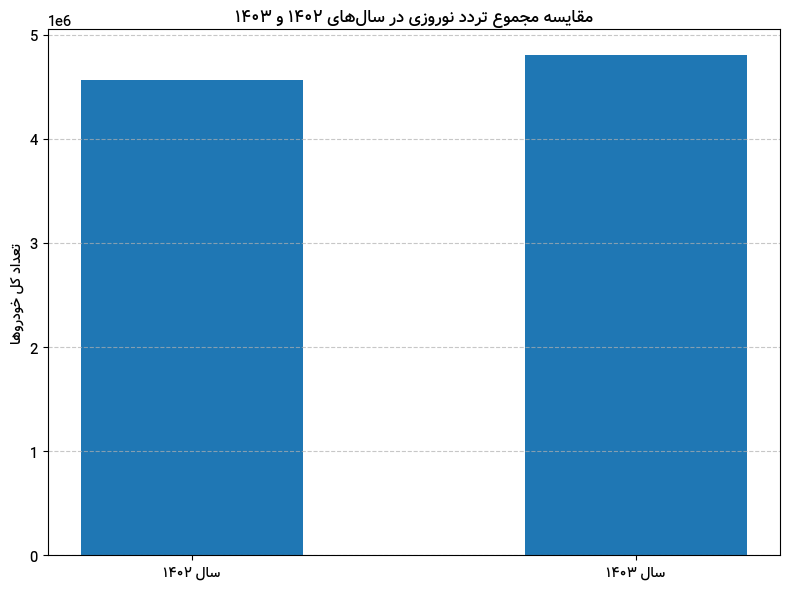

In [25]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import arabic_reshaper
from bidi.algorithm import get_display

# Set Persian font
matplotlib.rcParams['font.family'] = 'Vazir'  # or 'Tahoma'
matplotlib.rcParams['axes.unicode_minus'] = False

# Prepare reshaped Persian labels
labels_by_hand = ['سال ۱۴۰۲', 'سال ۱۴۰۳']
labels = [get_display(arabic_reshaper.reshape(label)) for label in labels_by_hand]

# Sum of vehicle counts for each year
count_03 = df_merged['est_sum_total_est_x'].sum()
count_02 = df_merged['est_sum_total_est_y'].sum()

print((count_03 - count_02) / count_02)
# Data for plotting
counts = [count_02, count_03]
x = np.arange(len(labels))
width = 0.5

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(x, counts, width)

plt.xticks(ticks=x, labels=labels)
plt.ylabel(get_display(arabic_reshaper.reshape('تعداد کل خودروها')))  # Total number of vehicles
plt.title(get_display(arabic_reshaper.reshape('مقایسه مجموع تردد نوروزی در سال‌های ۱۴۰۲ و ۱۴۰۳')))  # Title in Persian
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [26]:
import plotly.graph_objects as go
import pandas as pd

# جمع کل ترددها برای هر سال
count_02 = df_merged['est_sum_total_est_y'].sum()
count_03 = df_merged['est_sum_total_est_x'].sum()

# داده‌ها برای رسم نمودار
labels = ['سال ۱۴۰۲', 'سال ۱۴۰۳']
values = [count_02, count_03]
colors = ['#FFA55D', '#1d3557']

# رسم نمودار ستونی با Plotly
fig = go.Figure(data=[
    go.Bar(
        x=labels,
        y=values,
        marker_color=colors,
        text=[f'{int(v):,}' for v in values],
        textposition='outside'
    )
])

# تنظیمات ظاهری مطابق قالب تمپلیت اصلی
fig.update_layout(
    title='<b>مقایسه مجموع تردد نوروزی اصفهان در سال‌های ۱۴۰۲ و ۱۴۰۳</b>',
    title_x=0.5,
    xaxis=dict(
        title='سال',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
    ),
    yaxis=dict(
        title='تعداد کل خودروها',
        title_font=dict(size=16),
        tickfont=dict(size=14),
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray',
    ),
    font=dict(
        family='Yas',
        size=14,
    ),
    template='plotly_white',
    height=600,
    hovermode='x unified'
)

fig.show()


In [12]:
city_in_df = df[df['code'].isin(city_roads_df[city_roads_df.destination == city]['code'].tolist())]
city_out_df = df[df['code'].isin(city_roads_df[city_roads_df.origin == city]['code'].tolist())]

city_in_df.head()

,code,name,date,duration,total_count,car_count,total_est,car_est,avg_speed,total_est_normal
5157,543269,تقاطع سراوان - رشت,1402-12-11,55.0,874.0,736.0,19595.0,16501.0,92.0,-0.491171
5158,543269,تقاطع سراوان - رشت,1402-12-16,165.0,1991.0,1584.0,18824.0,14976.0,104.0,-0.700625
5159,543269,تقاطع سراوان - رشت,1402-12-17,1200.0,16092.0,11633.0,20174.0,14583.0,101.0,-0.333877
5160,543269,تقاطع سراوان - رشت,1402-12-18,1415.0,18987.0,14210.0,19366.0,14493.0,103.0,-0.553382
5161,543269,تقاطع سراوان - رشت,1402-12-19,1240.0,15169.0,12916.0,19213.0,16359.0,92.0,-0.594947


In [13]:
date = jdatetime.datetime.strptime("1402-12-10", "%Y-%m-%d").date()

in_list, out_list = [], []

for _ in range(40):
    in_cnt, out_cnt = 0, 0
    print(date)
    in_cnt = city_in_df[city_in_df.date == date].car_est.sum()
    out_cnt = city_out_df[city_out_df.date == date].car_est.sum()

    in_list.append([date, in_cnt, 'ورودی'])
    out_list.append([date, out_cnt, 'خروجی'])

    print(f"in: {in_cnt}, out: {out_cnt}, diff: {in_cnt - out_cnt}")
    date = date + jdatetime.timedelta(days=1)

1402-12-10
in: 118536.0, out: 87274.0, diff: 31262.0
1402-12-11
in: 132097.0, out: 83407.0, diff: 48690.0
1402-12-12
in: 128359.0, out: 87951.0, diff: 40408.0
1402-12-13
in: 129167.0, out: 94621.0, diff: 34546.0
1402-12-14
in: 125555.0, out: 93566.0, diff: 31989.0
1402-12-15
in: 129713.0, out: 95337.0, diff: 34376.0
1402-12-16
in: 155144.0, out: 100395.0, diff: 54749.0
1402-12-17
in: 155407.0, out: 104964.0, diff: 50443.0
1402-12-18
in: 140846.0, out: 98501.0, diff: 42345.0
1402-12-19
in: 150963.0, out: 104251.0, diff: 46712.0
1402-12-20
in: 122519.0, out: 71609.0, diff: 50910.0
1402-12-21
in: 119998.0, out: 72920.0, diff: 47078.0
1402-12-22
in: 113777.0, out: 73540.0, diff: 40237.0
1402-12-23
in: 125005.0, out: 71847.0, diff: 53158.0
1402-12-24
in: 124475.0, out: 78378.0, diff: 46097.0
1402-12-25
in: 115850.0, out: 64720.0, diff: 51130.0
1402-12-26
in: 130872.0, out: 75077.0, diff: 55795.0
1402-12-27
in: 174399.0, out: 99993.0, diff: 74406.0
1402-12-28
in: 184010.0, out: 101239.0, dif

In [14]:
in_tmp_df = pd.DataFrame(in_list, columns=['date', 'cnt', 'color'])
out_tmp_df = pd.DataFrame(out_list, columns=['date', 'cnt', 'color'])

flow_df = pd.concat([in_tmp_df, out_tmp_df], ignore_index=True)
flow_df

,date,cnt,color
0,1402-12-10,118536.0,ورودی
1,1402-12-11,132097.0,ورودی
2,1402-12-12,128359.0,ورودی
3,1402-12-13,129167.0,ورودی
4,1402-12-14,125555.0,ورودی
...,...,...,...
75,1403-01-16,113970.0,خروجی
76,1403-01-17,105418.0,خروجی
77,1403-01-18,95770.0,خروجی
78,1403-01-19,92848.0,خروجی


In [17]:
fig = px.bar(
    flow_df[
        (flow_df['date'] > jdatetime.datetime.strptime('1402-12-25', "%Y-%m-%d").date()) &
        (flow_df['date'] < jdatetime.datetime.strptime('1403-01-17', "%Y-%m-%d").date())],
    x='date',
    y='cnt',
    color='color',
    barmode='group',
    color_discrete_sequence=['green', 'red'],  # Custom colors
    title=f"<b>ورودی و خروجی برحسب تاریخ در {city}</b>"
)

fig.update_layout(
    xaxis=dict(
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title_standoff=25,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgray'
    )
)

fig.update_layout(
    font=dict(
        family='Yas',  # Use a Persian font
        size=14,
    ),
    title_x=0.5,  # Center title
    xaxis=dict(
        title_font=dict(size=16),
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title_font=dict(size=16),
        tickfont=dict(size=14)
    )
)


fig.update_layout(
    legend_title='',
    xaxis_title='تاریخ',
    xaxis_type='category',
    bargap=0.4,  # Gap between bars of different classes
    bargroupgap=0,  # Gap between bars of same class
    yaxis_title='تعداد',
    template='plotly_white',
    hovermode='x unified',
)

fig.show()